# Obesity risk factors classification

In [1]:
# import the nescessary libraries
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import naive_bayes
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

In [2]:
#importing the dataset
file_path = 'ObesityDataSet_raw_and_data_sinthetic.csv'
data = pd.read_csv(file_path)
data.head()

Gender   Age  Height  Weight family_history_with_overweight FAVC  FCVC  \
0  Female  21.0    1.62    64.0                            yes   no   2.0   
1  Female  21.0    1.52    56.0                            yes   no   3.0   
2    Male  23.0    1.80    77.0                            yes   no   2.0   
3    Male  27.0    1.80    87.0                             no   no   3.0   
4    Male  22.0    1.78    89.8                             no   no   2.0   

   NCP       CAEC SMOKE  CH2O  SCC  FAF  TUE        CALC  \
0  3.0  Sometimes    no   2.0   no  0.0  1.0          no   
1  3.0  Sometimes   yes   3.0  yes  3.0  0.0   Sometimes   
2  3.0  Sometimes    no   2.0   no  2.0  1.0  Frequently   
3  3.0  Sometimes    no   2.0   no  2.0  0.0  Frequently   
4  1.0  Sometimes    no   2.0   no  0.0  0.0   Sometimes   

                  MTRANS           NObeyesdad  
0  Public_Transportation        Normal_Weight  
1  Public_Transportation        Normal_Weight  
2  Public_Transportation        Normal_Weight  
3                Walking   Overweight_Level_I  
4  Public_Transportation  Overweight_Level_II

In [3]:
#checking for the data size and types
print(data.dtypes)
print(data.shape)

Gender                             object
Age                               float64
Height                            float64
Weight                            float64
family_history_with_overweight     object
FAVC                               object
FCVC                              float64
NCP                               float64
CAEC                               object
SMOKE                              object
CH2O                              float64
SCC                                object
FAF                               float64
TUE                               float64
CALC                               object
MTRANS                             object
NObeyesdad                         object
dtype: object
(2111, 17)


### Data cleaning and processing

In [4]:
# checking for the null value in dataset
data.isnull().sum()

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

since there is no null value we can continue to data processing

In [5]:
# radomizing the order in dataset
data = data.sample(frac=1).reset_index(drop=True)

In [6]:
# seperating data into classes and variables
variables = data.iloc[:,: -1]
classes = data.iloc[:, -1]
variables.head()

Gender        Age    Height      Weight family_history_with_overweight  \
0    Male  24.347414  1.789193   89.393589                            yes   
1    Male  22.185756  1.784555   89.836692                            yes   
2    Male  18.000000  1.700000   90.000000                             no   
3    Male  19.478533  1.804099   85.196279                            yes   
4  Female  26.000000  1.633887  111.878132                            yes   

  FAVC      FCVC       NCP       CAEC SMOKE      CH2O SCC       FAF       TUE  \
0  yes  1.521604  2.174968  Sometimes    no  2.000000  no  0.000000  0.632467   
1  yes  1.979944  1.599464  Sometimes    no  2.000000  no  0.170480  0.819475   
2  yes  3.000000  3.000000  Sometimes    no  2.000000  no  2.000000  0.000000   
3  yes  2.459976  3.308460  Sometimes    no  2.078011  no  1.779646  0.871772   
4  yes  3.000000  3.000000  Sometimes    no  2.621976  no  0.000000  0.123861   

        CALC                 MTRANS  
0  Sometimes  Public_Transportation  
1  Sometimes  Public_Transportation  
2  Sometimes  Public_Transportation  
3  Sometimes  Public_Transportation  
4  Sometimes  Public_Transportation

In [7]:
# since height and weight is a function of body type, we will drop these two variables to focus on the other risk factors
variables = variables.drop('Height', axis=1)
variables = variables.drop('Weight', axis=1)
variables.head()

Gender        Age family_history_with_overweight FAVC      FCVC       NCP  \
0    Male  24.347414                            yes  yes  1.521604  2.174968   
1    Male  22.185756                            yes  yes  1.979944  1.599464   
2    Male  18.000000                             no  yes  3.000000  3.000000   
3    Male  19.478533                            yes  yes  2.459976  3.308460   
4  Female  26.000000                            yes  yes  3.000000  3.000000   

        CAEC SMOKE      CH2O SCC       FAF       TUE       CALC  \
0  Sometimes    no  2.000000  no  0.000000  0.632467  Sometimes   
1  Sometimes    no  2.000000  no  0.170480  0.819475  Sometimes   
2  Sometimes    no  2.000000  no  2.000000  0.000000  Sometimes   
3  Sometimes    no  2.078011  no  1.779646  0.871772  Sometimes   
4  Sometimes    no  2.621976  no  0.000000  0.123861  Sometimes   

                  MTRANS  
0  Public_Transportation  
1  Public_Transportation  
2  Public_Transportation  
3  Public_Transportation  
4  Public_Transportation

In [8]:
# encoding variable into binomial and numerical value
var_encoding = {'Gender':                         {'Male': 0, 'Female': 1},
                'family_history_with_overweight': {'yes': 1, 'no': 0},
                'FAVC':                           {'yes': 1, 'no': 0},
                'CAEC':                           {'no': 0, 'Sometimes': 1,
                                                  'Frequently': 2, 'Always': 3},
                'SMOKE':                          {'yes': 1, 'no': 0},
                'SCC':                            {'yes': 1, 'no': 0},
                'CALC':                           {'no': 0, 'Sometimes': 1,
                                                  'Frequently': 2, 'Always': 3}}
variables = variables.replace(var_encoding)
variables.head()

Gender        Age  family_history_with_overweight  FAVC      FCVC  \
0       0  24.347414                               1     1  1.521604   
1       0  22.185756                               1     1  1.979944   
2       0  18.000000                               0     1  3.000000   
3       0  19.478533                               1     1  2.459976   
4       1  26.000000                               1     1  3.000000   

        NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  \
0  2.174968     1      0  2.000000    0  0.000000  0.632467     1   
1  1.599464     1      0  2.000000    0  0.170480  0.819475     1   
2  3.000000     1      0  2.000000    0  2.000000  0.000000     1   
3  3.308460     1      0  2.078011    0  1.779646  0.871772     1   
4  3.000000     1      0  2.621976    0  0.000000  0.123861     1   

                  MTRANS  
0  Public_Transportation  
1  Public_Transportation  
2  Public_Transportation  
3  Public_Transportation  
4  Public_Transportation

In [9]:
# for MTRANS, we will use one-hot encoding method since their is no linear relationship between each variables
mtrans = pd.get_dummies(variables['MTRANS'])
mtrans.head()

Automobile  Bike  Motorbike  Public_Transportation  Walking
0           0     0          0                      1        0
1           0     0          0                      1        0
2           0     0          0                      1        0
3           0     0          0                      1        0
4           0     0          0                      1        0

In [10]:
# combining the encoded MTRANS with the rest of the variables
variables = variables.drop('MTRANS', axis=1)
variables = pd.concat([variables, mtrans], axis=1)
variables.head()

Gender        Age  family_history_with_overweight  FAVC      FCVC  \
0       0  24.347414                               1     1  1.521604   
1       0  22.185756                               1     1  1.979944   
2       0  18.000000                               0     1  3.000000   
3       0  19.478533                               1     1  2.459976   
4       1  26.000000                               1     1  3.000000   

        NCP  CAEC  SMOKE      CH2O  SCC       FAF       TUE  CALC  Automobile  \
0  2.174968     1      0  2.000000    0  0.000000  0.632467     1           0   
1  1.599464     1      0  2.000000    0  0.170480  0.819475     1           0   
2  3.000000     1      0  2.000000    0  2.000000  0.000000     1           0   
3  3.308460     1      0  2.078011    0  1.779646  0.871772     1           0   
4  3.000000     1      0  2.621976    0  0.000000  0.123861     1           0   

   Bike  Motorbike  Public_Transportation  Walking  
0     0          0                      1        0  
1     0          0                      1        0  
2     0          0                      1        0  
3     0          0                      1        0  
4     0          0                      1        0

In [11]:
# due to the limited data size, we will simplify the classes to make the task more managable for the algorityms
cla_encoding = {'Overweight_Level_I': 'Overweight',
               'Overweight_Level_II': 'Overweight',
               'Obesity_Type_I':      'Obesity',
               'Obesity_Type_II':     'Obesity',
               'Obesity_Type_III':    'Obesity'}
classes = classes.replace(cla_encoding)
classes.head()

0    Overweight
1    Overweight
2       Obesity
3    Overweight
4       Obesity
Name: NObeyesdad, dtype: object

### data virtualization

In [32]:
var_columns = variables.columns.values.tolist()

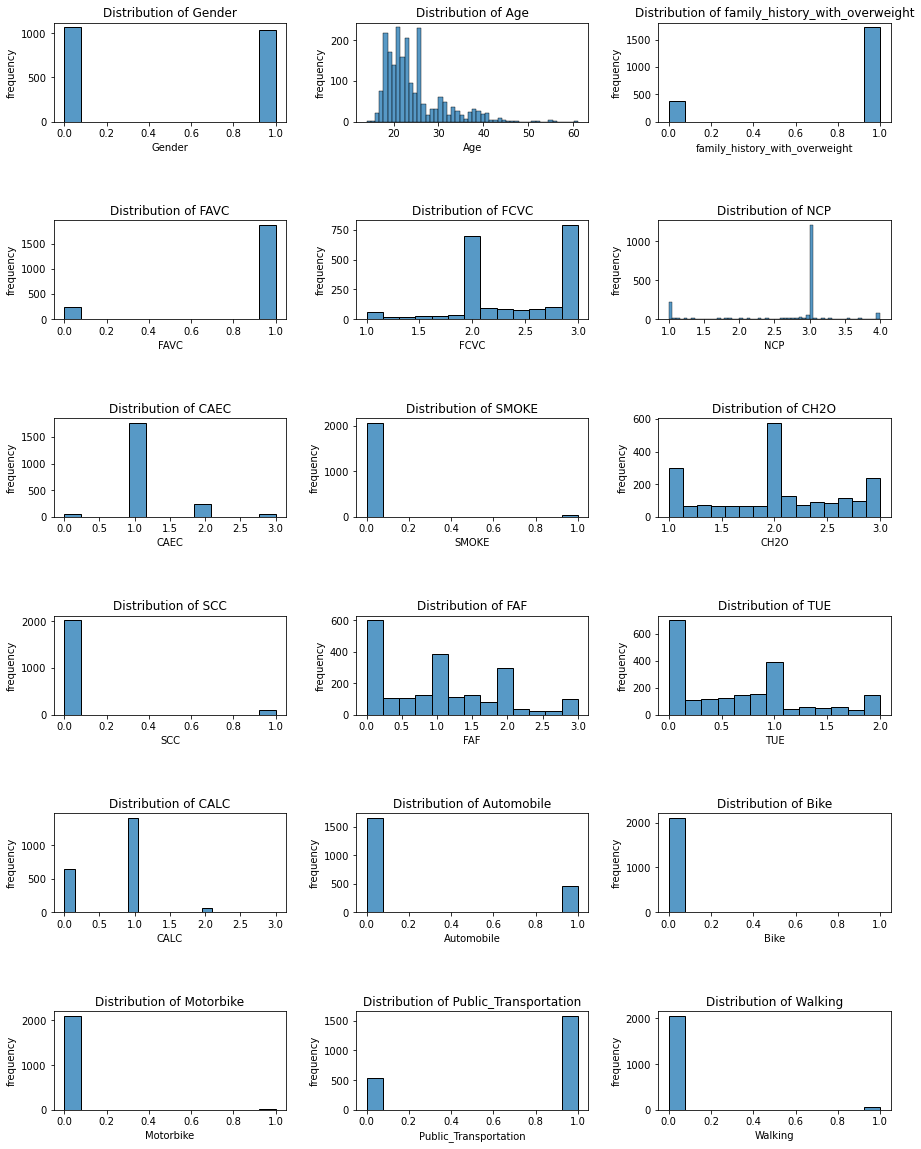

In [43]:
# ploting the frequency distribution of each variable
plt.figure(1, figsize=(15, 20))
n = 0
for x in var_columns:
    n += 1
    plt.subplot(6, 3, n)
    plt.subplots_adjust(hspace=1, wspace=0.3)
    sns.histplot(variables[x])
    plt.title('Distribution of {}'.format(x))
    plt.xlabel(x)
    plt.ylabel('frequency')
plt.show()

C:\Users\Ice\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Ice\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

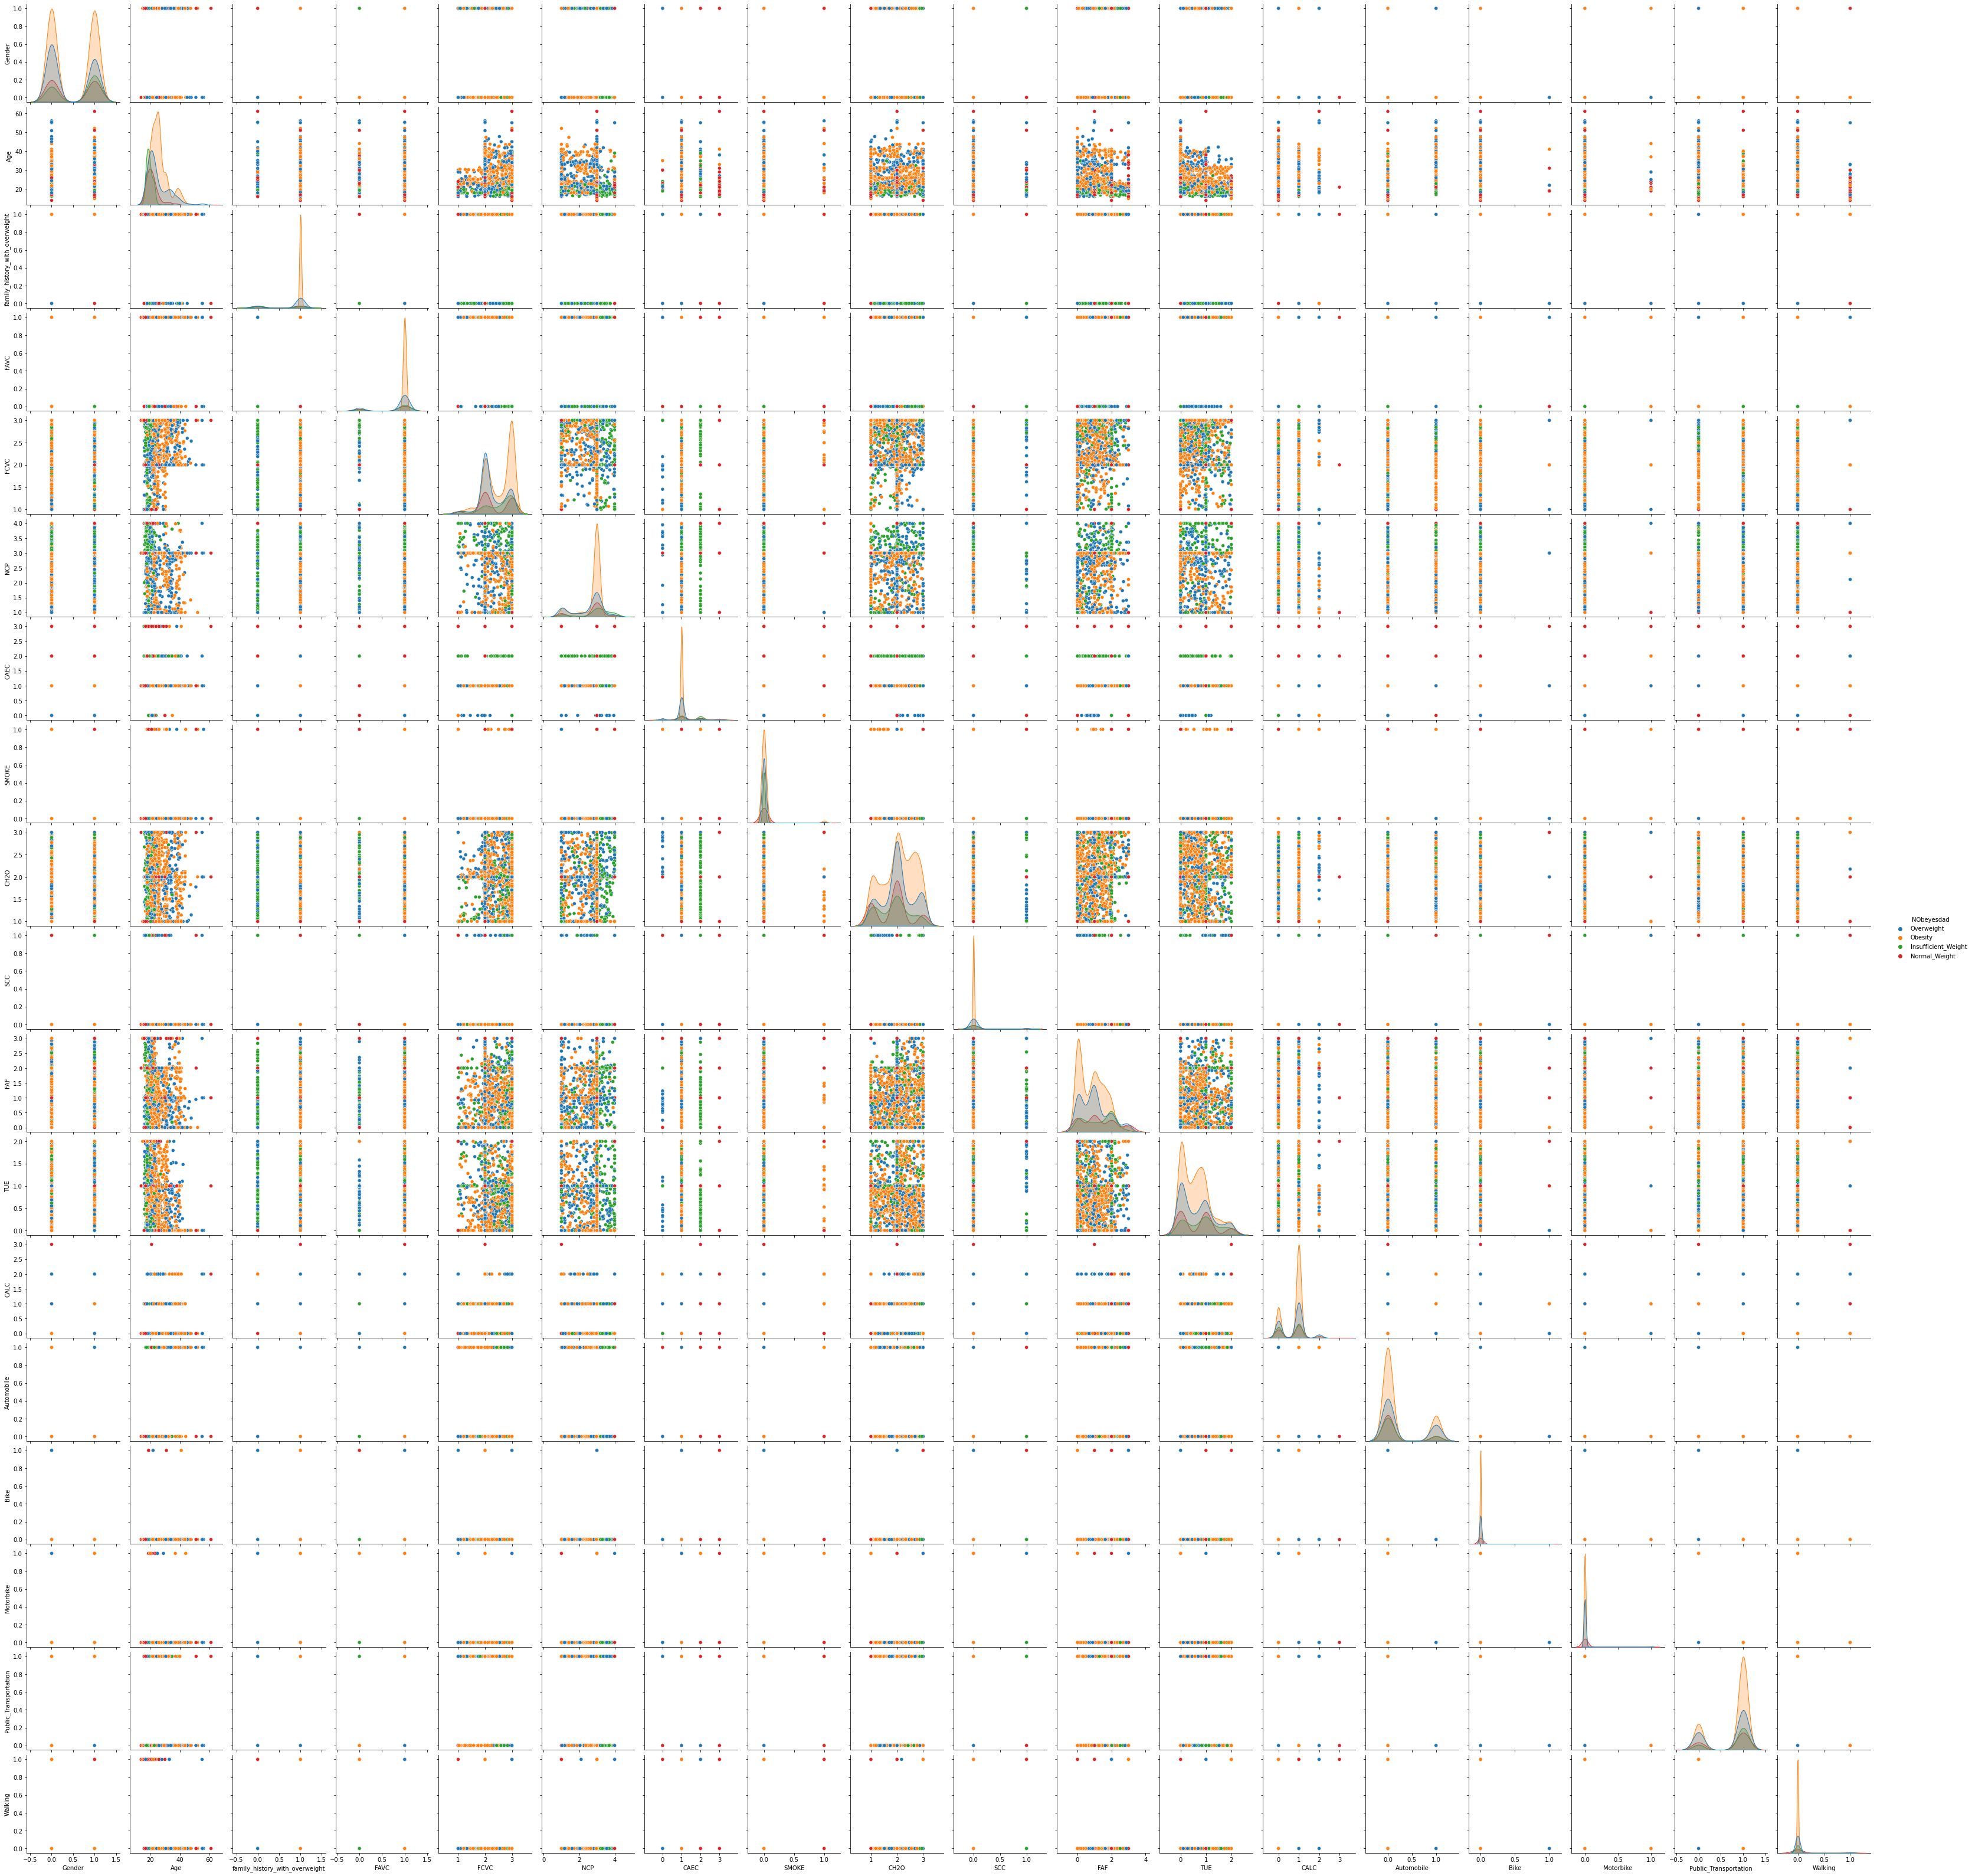

In [52]:
#ploting the relation ship between each variables and classes
plot_data = pd.concat([variables,classes], axis=1)
plt.figure()
sns.pairplot(plot_data, hue='NObeyesdad')
plt.show()

C:\Users\Ice\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\Ice\anaconda3\lib\site-packages\seaborn\distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


<Figure size 432x288 with 0 Axes>

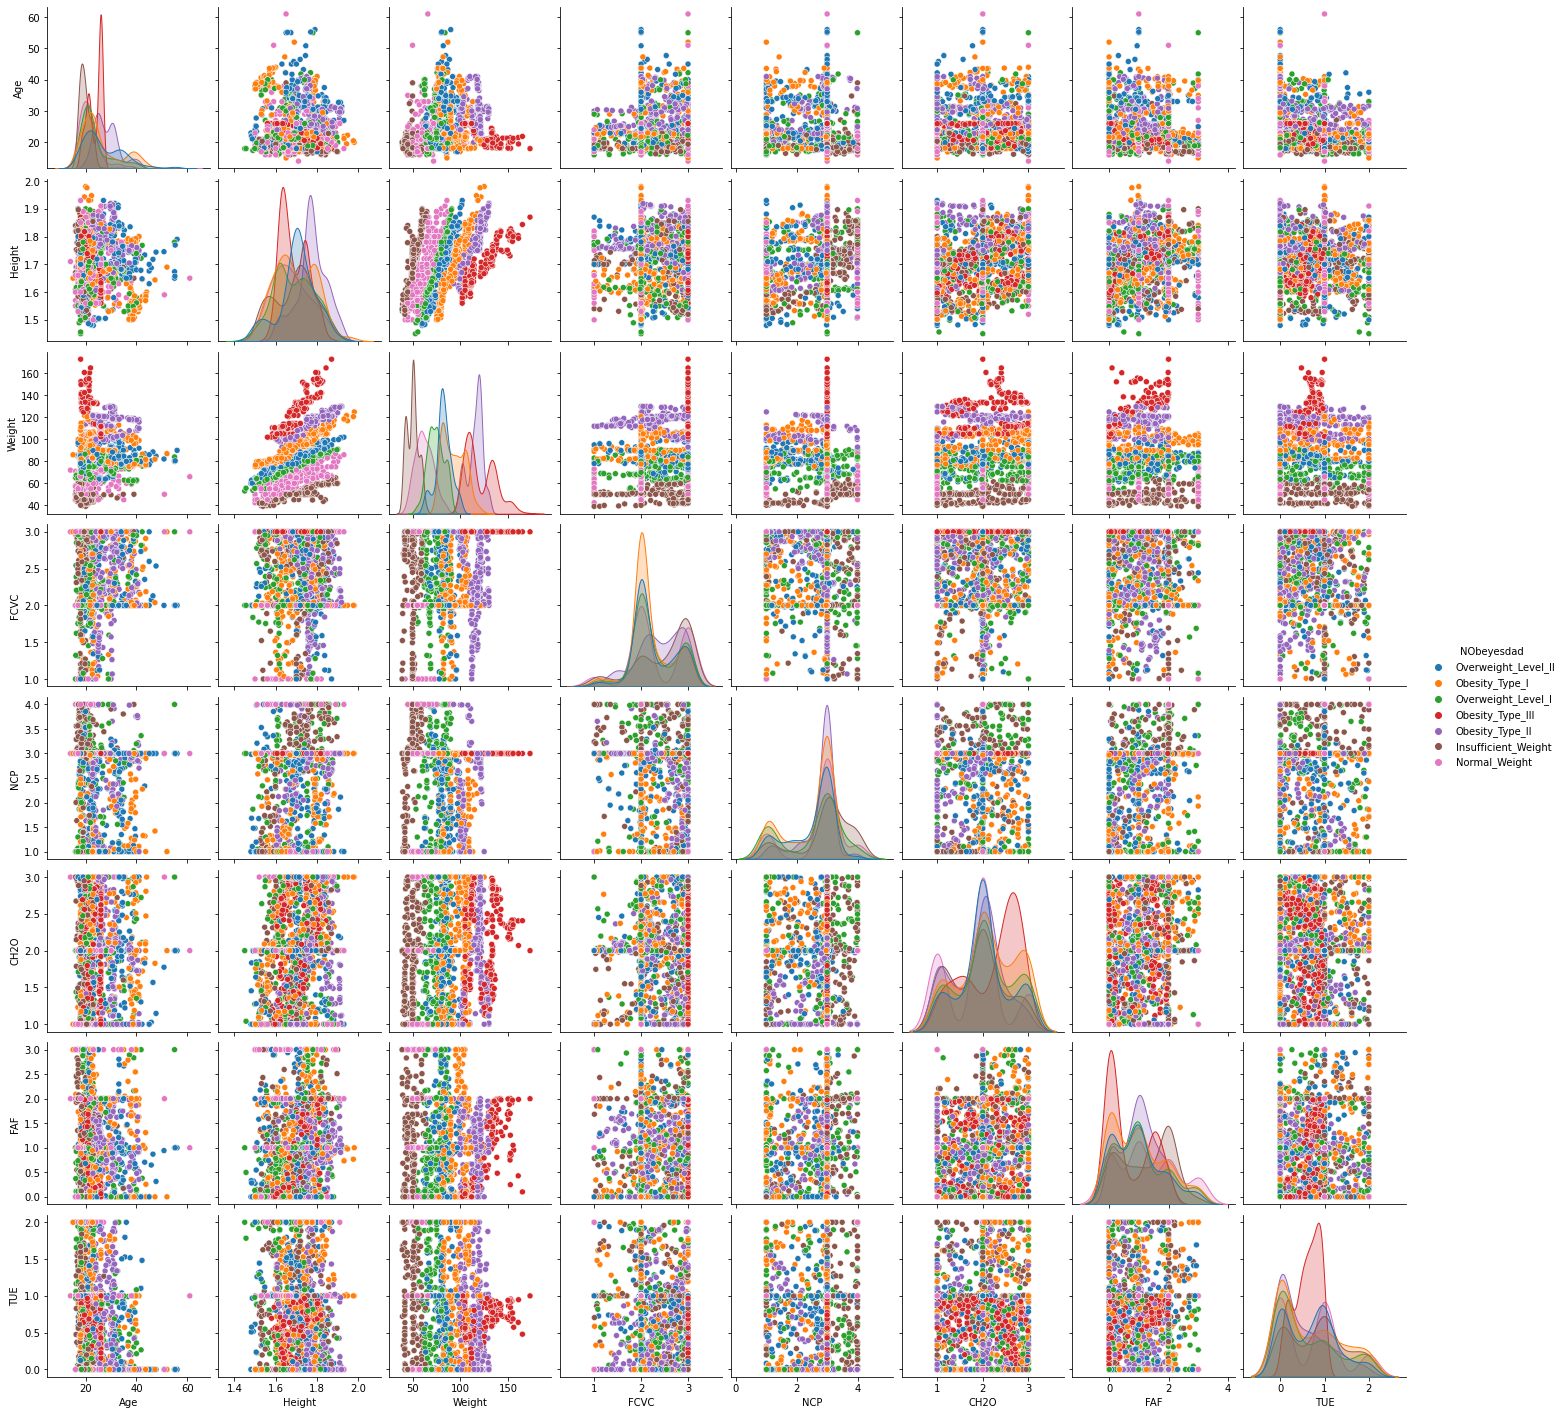

In [53]:

plt.figure()
sns.pairplot(data, hue='NObeyesdad')
plt.show()